<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Prepared by Abuzer Yakaryilmaz<br>
        Utku Birkan | September 16, 2019 (updated)<br>
        Özlem Salehi | September 20, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> Initializing a qubit with an arbitrary state </h2>


Qiskit circuits have a built in method called initialize which allows starting from a specifed state instead of having all qubits start as 0. 

Note that the state should be a valid quantum state and the length of the vector should match the number of qubits. If not, exception is raised.

Let's create a quantum circuit with two qubits and initialize it by setting equal probabilities to each outcome.

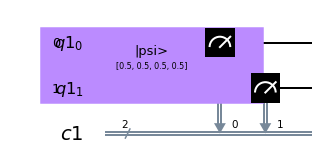

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with two qubits and two bits
qreg1 =  QuantumRegister(2) # quantum register with two qubits
creg1 = ClassicalRegister(2) # classical register with two bits
mycircuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# initialization
init_state=[1/2,1/2,1/2,1/2]
mycircuit1.initialize(init_state,qreg1)

# measure the qubits
mycircuit1.measure(qreg1,creg1)

# draw the circuit
mycircuit1.draw(output='mpl')

In [4]:
# execute the program 1000 times
job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)

# print the results
counts = job.result().get_counts(mycircuit1)
print(counts) # counts is a dictionary

{'11': 250, '00': 245, '01': 245, '10': 260}


<h3>Task 1</h3>

Create a quantum circuit with a single qubit. Use the function you have written for creating random quantum states in the notebook <a href="../B28_Quantum_State.ipynb">Quantum States</a> and initilize your qubit to a random state. Use statevector simulator to check if you are successfull.



In [7]:
# %load randqstate.py
from random import randrange

# randomly creating a 2-dimensional quantum state
def random_quantum_state():
    first_entry = randrange(100)
    second_entry = randrange(100)
    
    length=(first_entry**2 + second_entry**2)**0.5
    first_entry = (first_entry/length)
    second_entry = (second_entry/length)
    if randrange(2) == 0: # determine the sign
        first_entry = -1 * first_entry
    
    if randrange(2) == 0: # determine the sign
        second_entry = -1 * second_entry  
    return [first_entry,second_entry]


In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

#
qreg1 =  QuantumRegister(1) # quantum register with a single qubit
creg1 = ClassicalRegister(1) # classical register with a single bit
mycircuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

#get a random quantum state
rand_state=random_quantum_state()
print(rand_state)

#initialization
mycircuit1.initialize(rand_state,qreg1)

# Execute and get counts
job = execute(mycircuit1, Aer.get_backend('statevector_simulator'))
statevector = job.result().get_statevector(mycircuit1)
print(statevector)
#

[-0.9998740474835989, 0.015871016626723793]
[-0.99987405+0.j  0.01587102+0.j]


<a href="B32_Initializing_a_Qubit_Solutions.ipynb#task1">click for our solution</a>

### Task 2

Create a quantum circuit with a single qubit. Choose a random angle $\theta$ and use the function you have written for creating random quantum states in the notebook <a href="../B30_Visualization_of_a_Qubit.ipynb">Visualization of a Qubit</a>. Use statevector simulator to check if you are successfull.

In [13]:
# %load randqstate2.py

# randomly create a 2-dimensional quantum state
from math import cos, sin, pi
from random import randrange

def random_quantum_statea(angle_degree):
    angle_radian = 2*pi*angle_degree/360
    return [cos(angle_radian),sin(angle_radian)]
    


In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

#
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, atan, sqrt, sin, cos
from random import randrange

# Create a quantum circuit
qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg,creg)

angle_degree = randrange(360)
state=random_quantum_statea(angle_degree)

print("Quantum state:")
print(state)

# Initialize circuit
circuit.initialize(state, qreg)

# Now execute this circuit
job = execute(circuit, Aer.get_backend('statevector_simulator'))
statevector = job.result().get_statevector(circuit)
print("Statevector:")
print(statevector)
#

Quantum state:
[0.12186934340514749, 0.992546151641322]
Statevector:
[0.12186934+0.j 0.99254615+0.j]


<a href="B32_Initializing_a_Qubit_Solutions.ipynb#task2">click for our solution</a>